In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pyEDM import * 
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d

In [18]:
def bounded_random_walk(length, lower_bound,  upper_bound, start, end, std):
    assert (lower_bound <= start and lower_bound <= end)
    assert (start <= upper_bound and end <= upper_bound)

    bounds = upper_bound - lower_bound

    rand = (std * (np.random.random(length) - 0.5)).cumsum()
    rand_trend = np.linspace(rand[0], rand[-1], length)
    rand_deltas = (rand - rand_trend)
    rand_deltas /= np.max([1, (rand_deltas.max()-rand_deltas.min())/bounds])

    trend_line = np.linspace(start, end, length)
    upper_bound_delta = upper_bound - trend_line
    lower_bound_delta = lower_bound - trend_line

    upper_slips_mask = (rand_deltas-upper_bound_delta) >= 0
    upper_deltas =  rand_deltas - upper_bound_delta
    rand_deltas[upper_slips_mask] = (upper_bound_delta - upper_deltas)[upper_slips_mask]

    lower_slips_mask = (lower_bound_delta-rand_deltas) >= 0
    lower_deltas =  lower_bound_delta - rand_deltas
    rand_deltas[lower_slips_mask] = (lower_bound_delta + lower_deltas)[lower_slips_mask]

    return trend_line + rand_deltas



In [36]:
randomData = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
randomData2 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
randomData3 = bounded_random_walk(100, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
randomData4 = bounded_random_walk(100, lower_bound=0, upper_bound =1, start=0, end=0, std=10)

In [6]:
rd1 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd2 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd3 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd4 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd5 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd6 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd7 = bounded_random_walk(36, lower_bound=-0, upper_bound =1, start=0, end=0, std=10)
rd8 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)
rd9 = bounded_random_walk(36, lower_bound=0, upper_bound =1, start=0, end=0, std=10)
rd10 = bounded_random_walk(36, lower_bound=-1, upper_bound =0, start=0, end=0, std=10)

In [12]:
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(101, 200, 100 )
x3 = np.linspace(201, 300, 100 )
x4 = np.linspace(301, 400, 100 )

In [13]:
sx1 = np.arange(0,20*np.pi,0.1)   # start,stop,step
sy1 = (np.sin(sx1/2))/2
sy1.shape

(629,)

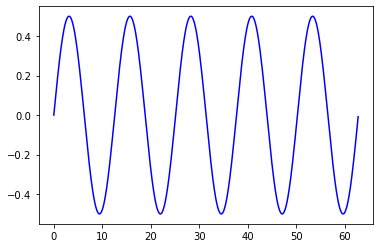

In [39]:
fig = plt.figure()
plt.plot(sx1,sy1, 'b')

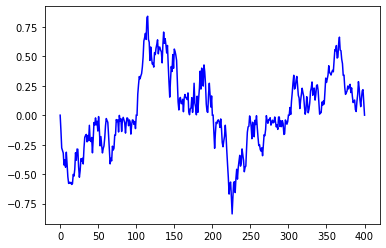

In [38]:
fig = plt.figure()
plt.plot(x1, randomData, 'b')
plt.plot(x2, randomData2, 'b')
plt.plot(x3, randomData3, 'b')
plt.plot(x4, randomData4, 'b')


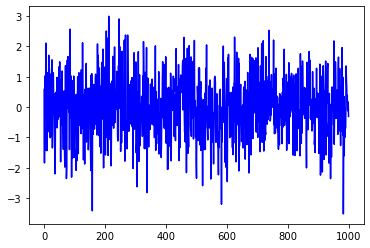

In [42]:
import numpy
import matplotlib.pyplot as plt

mean = 0
std = 1 
num_samples = 1000
samples = numpy.random.normal(mean, std, size=num_samples)

plt.plot(samples, 'b')
plt.show()

In [46]:
total_gens = 30000
gens = 1000
np.random.seed(1)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.head()

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/pynamical/pynamical.py:381: NumbaWarning: Cannot cache compiled function "jit_simulator" as it uses outer variables in a closure
  @jit(cache=True, nopython=True) # pragma: no cover


,chaos,random
0,0.900520,0.417022
1,0.357438,0.720324
2,0.916407,0.000114
3,0.305654,0.302333
4,0.846796,0.146756


NameError: name 'title_font' is not defined

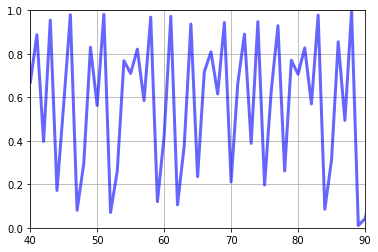

In [51]:
ax = time_series.chaos.plot(kind='line', linewidth=3, alpha=0.6, color = 'b')
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, Deterministic Chaos vs Random Data', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(loc=3)

save_fig('chaos-vs-random-line')
plt.show()